Importamos librerías

In [24]:
%pip install --upgrade pandas numpy nltk scikit-learn matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Cargamos datos

In [26]:
# Load dataset
data = pd.read_csv('../data/Sentimiento.csv')

### Primer Paso: Preprocesamiento de datos


In [27]:
# Step 1: Data Preprocessing
import nltk
nltk.download('stopwords')  # For stopwords
nltk.download('punkt')      # For tokenization
nltk.download('wordnet')    # For lemmatization
nltk.download('omw-1.4')    # For multilingual WordNet support
nltk.download('punkt_tab')  # For multilingual tokenization

[nltk_data] Downloading package stopwords to C:\Users\Laura
[nltk_data]     Rodríguez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Laura
[nltk_data]     Rodríguez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Laura
[nltk_data]     Rodríguez\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Laura
[nltk_data]     Rodríguez\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Laura
[nltk_data]     Rodríguez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [29]:
# Text Cleaning Function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

In [30]:
data['texto_limpio'] = data['texto'].apply(preprocess_text)

### Segundo Paso: Vectorización y modelo de Naive Bayes

In [31]:
# Step 2: Vectorization and Naive Bayes Model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['texto_limpio'])

# Assign labels for sentiment categories
# Assume the dataset contains a 'label' column with predefined sentiments ('Good', 'Neutral', 'Bad')
# If not, labels need to be created based on intensity or other criteria.
y = data['sentimiento']  # Update this line if the labels are generated dynamically

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Predict sentiments
y_pred = model.predict(X_test)

In [35]:
# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
print("F1 Score (Weighted):", f1)

Classification Report:
               precision    recall  f1-score   support

         bad       0.82      0.89      0.85     21474
        good       0.60      0.86      0.71     11204
     neutral       0.64      0.27      0.38     11181

    accuracy                           0.72     43859
   macro avg       0.69      0.67      0.65     43859
weighted avg       0.72      0.72      0.70     43859

Accuracy Score: 0.7232267037552156
F1 Score (Weighted): 0.696313996028679


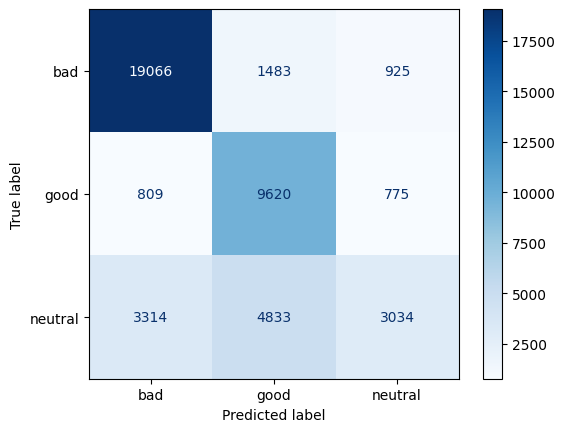

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

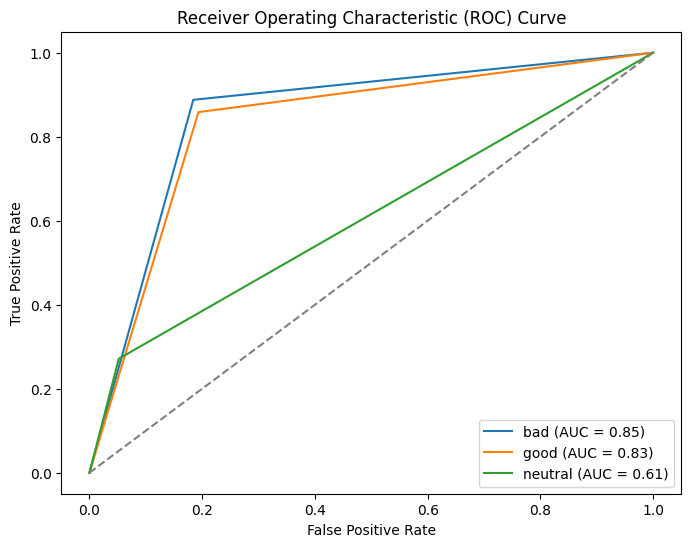

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output labels (for multiclass)
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_bin = label_binarize(y_pred, classes=model.classes_)

# Compute ROC curve for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



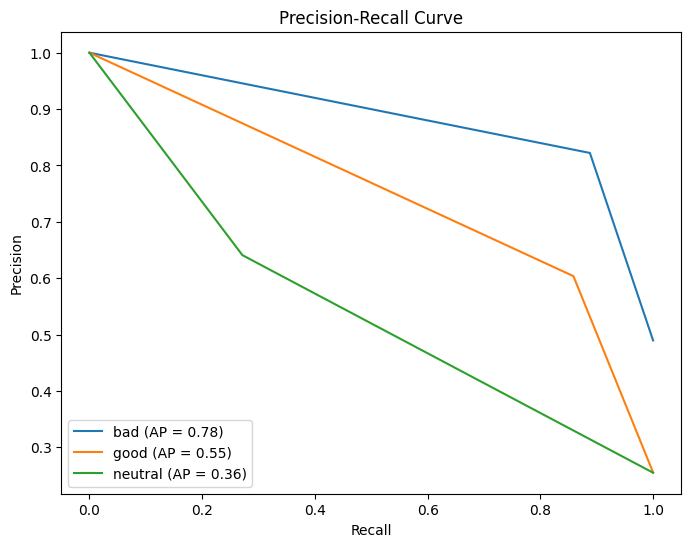

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the output labels (for multiclass)
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_bin = label_binarize(y_pred, classes=model.classes_)

# Compute Precision-Recall curve for each class
precision, recall, avg_precision = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], label=f'{model.classes_[i]} (AP = {avg_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [39]:
# Add predictions and sentiment intensity to the dataset
data['sentimiento_predicho'] = model.predict(X)

In [40]:
# Calculate sentiment intensity based on probabilities
def sentiment_intensity_prob(text):
    text_vectorized = vectorizer.transform([text])
    probabilities = model.predict_proba(text_vectorized)[0]
    return max(probabilities) * (1 if model.predict(text_vectorized)[0] == 'good' else -1 if model.predict(text_vectorized)[0] == 'bad' else 0)

In [41]:
data['intensidad'] = data['texto_limpio'].apply(sentiment_intensity_prob)

### Tercer Paso: Análisis de Resultados

In [42]:
# Step 3: Analyze Results
# Percentage distribution of sentiments
sentiment_distribution = data['sentimiento_predicho'].value_counts(normalize=True) * 100

In [43]:
# Identify frequently mentioned topics
common_words = vectorizer.get_feature_names_out()
word_counts = X.sum(axis=0).A1
topic_df = pd.DataFrame({'word': common_words, 'count': word_counts}).sort_values(by='count', ascending=False)

### Visualización de los resultados

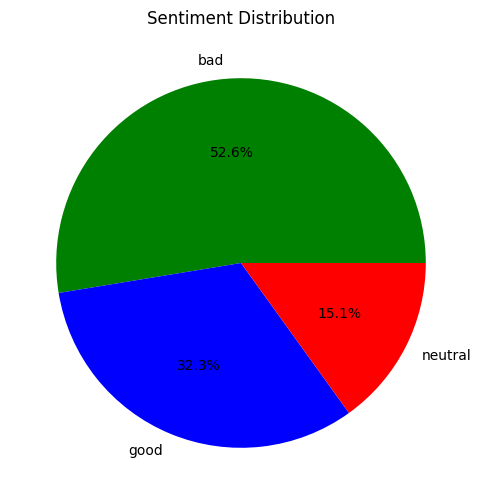

In [44]:
# Step 4: Visualization
# Sentiment distribution pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.show()


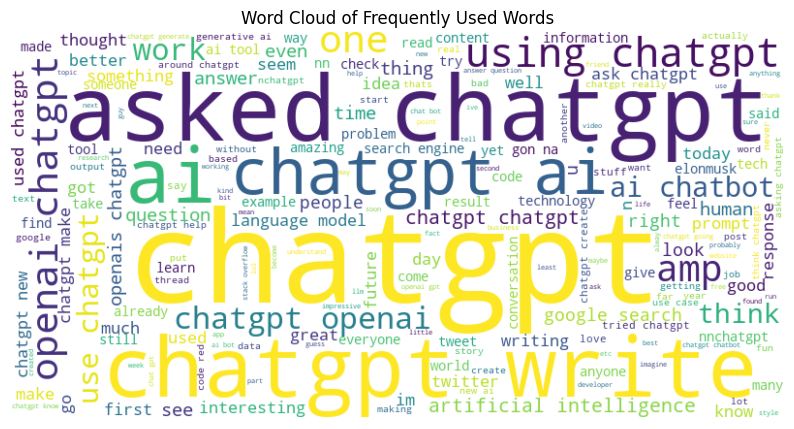

In [45]:
# Word cloud of common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['texto_limpio']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequently Used Words')
plt.show()

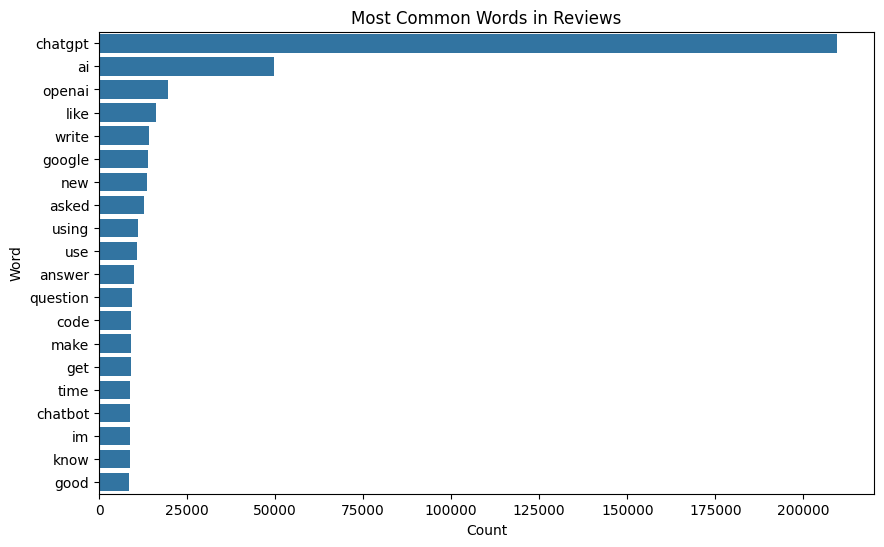

In [46]:
# Bar chart for most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=topic_df.head(20))
plt.title('Most Common Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


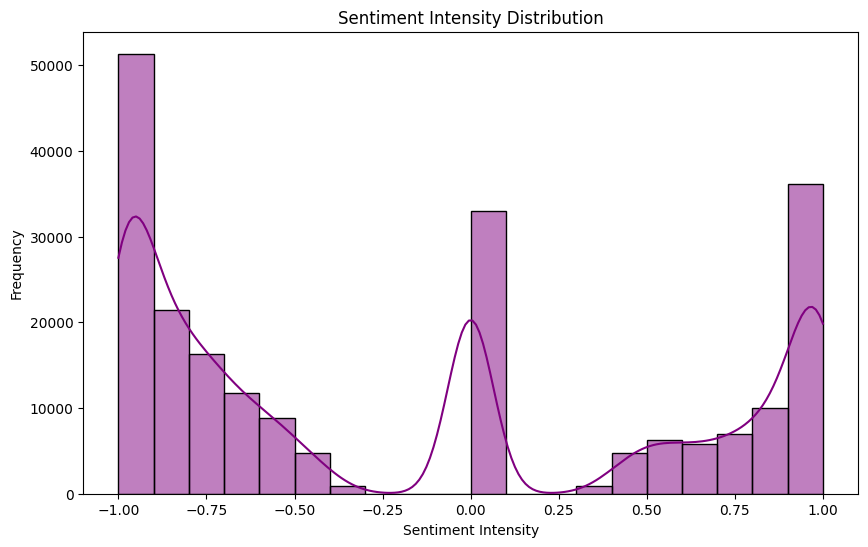

In [47]:
# Sentiment intensity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['intensidad'], bins=20, kde=True, color='purple')
plt.title('Sentiment Intensity Distribution')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Frequency')
plt.show()


Guardamos resultados

In [49]:
# Save results to CSV
data.to_csv('../results/sentiment_analysis_results.csv', index=False)

print("Sentiment Analysis with Naive Bayes Completed and Results Saved.")

Sentiment Analysis with Naive Bayes Completed and Results Saved.
